In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
x = sp.Function('x', real=True)
t = sp.Symbol('t', real=True)
w0 = sp.Symbol('omega_0', real=True, positive=True)
beta = sp.Symbol('beta', real=True, positive=True) #wsp. tłumienia
alfa0 = sp.Symbol('alpha_0', real=True, positive=True) #amplituda siły wymuszającej
ww = sp.Symbol('omega_w', real=True, positive=True) #częstotliwość siły wymuszającej

x0 = sp.Symbol('x_0', real=True)
v0 = sp.Symbol('v_0', real=True)

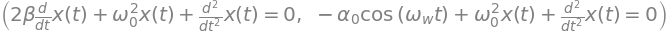

In [3]:
osc_tlm = sp.Eq(x(t).diff(t, t) + 2 * beta * x(t).diff(t) + w0**2 * x(t), 0)
osc_wym = sp.Eq(x(t).diff(t, t) - alfa0 * sp.cos(ww * t) + w0**2 * x(t), 0)
osc_tlm, osc_wym

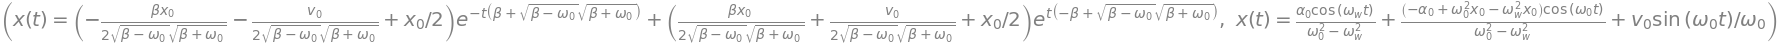

In [4]:
osc_tlm_solved = sp.dsolve(osc_tlm, x(t), ics={x(0) : x0, x(t).diff(t).subs(t, 0) : v0})
osc_wym_solved = sp.dsolve(osc_wym, x(t), ics={x(0) : x0, x(t).diff(t).subs(t, 0) : v0})
osc_tlm_solved, osc_wym_solved

In [10]:
osc_wym_lambd = sp.lambdify((t, ww), osc_wym_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, alfa0 : 1}))


osc_tlm_lambd_b0_1 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 0.1}))
osc_tlm_lambd_b0_2 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 0.2}))
osc_tlm_lambd_b0_5 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 0.5}))
osc_tlm_lambd_b0_9 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 0.9}))
osc_tlm_lambd_b1_1 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 1.1}))
osc_tlm_lambd_b2_0 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 2.0}))
osc_tlm_lambd_b5_0 = sp.lambdify((t), osc_tlm_solved.rhs.subs({x0 : 0, v0 : 1, w0 : 1, beta : 5.0}))

c:\Users\Piotrek\AppData\Local\pypoetry\Cache\virtualenvs\pwzn-pb-z8-vrupqz9v-py3.10\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Piotrek\AppData\Local\pypoetry\Cache\virtualenvs\pwzn-pb-z8-vrupqz9v-py3.10\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


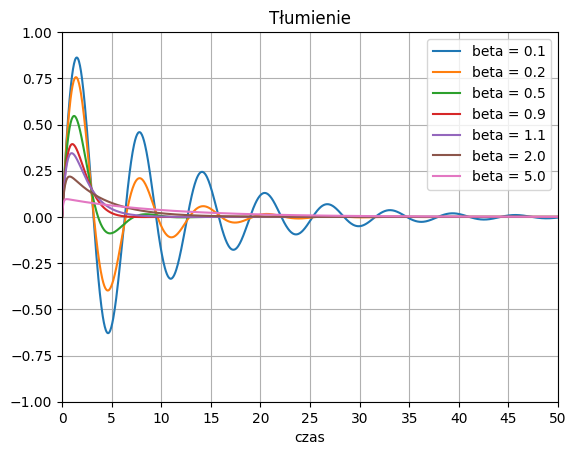

In [19]:
tmax = 50
ts = np.linspace(0, tmax, 1000)

plt.plot(ts, osc_tlm_lambd_b0_1(ts), label='beta = 0.1')
plt.plot(ts, osc_tlm_lambd_b0_2(ts), label='beta = 0.2')
plt.plot(ts, osc_tlm_lambd_b0_5(ts), label='beta = 0.5')
plt.plot(ts, osc_tlm_lambd_b0_9(ts), label='beta = 0.9')
plt.plot(ts, osc_tlm_lambd_b1_1(ts), label='beta = 1.1')
plt.plot(ts, osc_tlm_lambd_b2_0(ts), label='beta = 2.0')
plt.plot(ts, osc_tlm_lambd_b5_0(ts), label='beta = 5.0')
plt.title('Tłumienie')
plt.xlim(0, tmax)
plt.ylim(-1, 1)
plt.xticks(range(0, tmax+1, 5))
plt.xlabel('czas')
plt.grid(linestyle='-')
plt.legend()

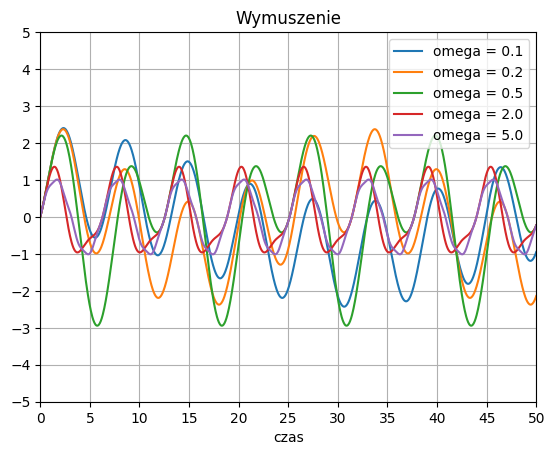

In [18]:
tmax = 50
ts = np.linspace(0, tmax, 1000)

plt.plot(ts, osc_wym_lambd(ts, 0.1), label='omega = 0.1')
plt.plot(ts, osc_wym_lambd(ts, 0.2), label='omega = 0.2')
plt.plot(ts, osc_wym_lambd(ts, 0.5), label='omega = 0.5')
# plt.plot(ts, osc_wym_lambd(ts, 0.9), label='omega = 0.9')
# plt.plot(ts, osc_wym_lambd(ts, 1.1), label='omega = 1.1')
plt.plot(ts, osc_wym_lambd(ts, 2.0), label='omega = 2.0')
plt.plot(ts, osc_wym_lambd(ts, 5.0), label='omega = 5.0')
plt.title('Wymuszenie')
plt.xlim(0, tmax)
plt.ylim(-5, 5)
plt.xticks(range(0, tmax+1, 5))
plt.yticks(range(-5, 6))
plt.xlabel('czas')
plt.grid(linestyle='-')
plt.legend()

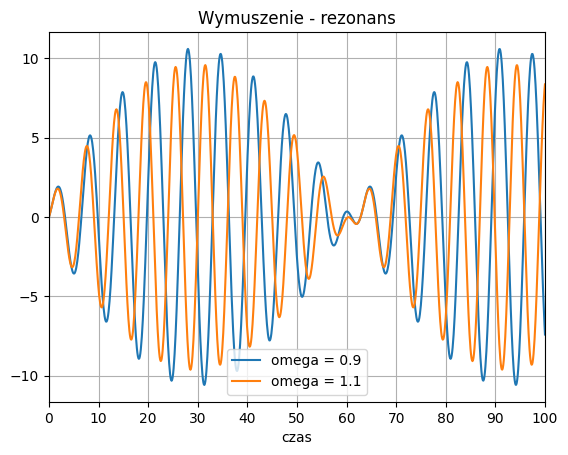

In [29]:
tmax = 100
ts = np.linspace(0, tmax, 1000)

plt.plot(ts, osc_wym_lambd(ts, 0.9), label='omega = 0.9')
plt.plot(ts, osc_wym_lambd(ts, 1.1), label='omega = 1.1')
plt.title('Wymuszenie - rezonans')
plt.xlim(0, tmax)
# plt.ylim(-5, 5)
plt.xticks(range(0, tmax+1, tmax//10))
# plt.yticks(range(-5, 6))
plt.xlabel('czas')
plt.grid(linestyle='-')
plt.legend()